# IRCTC Stock Price Prediction

- Data was extracted from National Stock Exchange website.
- IRCTC data contains datas from 28/10/2021 to 01/02/2023.
- IRCTC : INDIAN RAILWAY CATERING AND TOURISM CORPORATION LIMITED

### Data Preparation and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IRCTC-EQ-28-10-2021-to-02-02-2023.csv')

In [3]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W_H,52W_L,VOLUME,VALUE,No_of_trades
0,28-10-2021,EQ,817.00,983.00,810.00,"4,130.15",923.00,913.50,925.41,"6,396.30",810.00,59298778,"54,87,59,31,755.65",1928611
1,29-10-2021,EQ,822.15,906.45,639.45,913.5,842.80,845.70,803.28,"6,396.30",639.45,82848030,"66,55,04,41,966.50",2259771
2,01-11-2021,EQ,874.20,885.00,809.25,845.7,856.00,855.45,845.02,"6,396.30",639.45,29989312,"25,34,15,24,475.55",902975
3,02-11-2021,EQ,868.40,868.80,844.25,855.45,846.50,848.20,853.83,"6,396.30",639.45,9742650,"8,31,85,99,198.20",308817
4,03-11-2021,EQ,840.00,848.90,815.10,848.2,819.25,819.85,829.88,"6,396.30",639.45,10088006,"8,37,18,62,868.90",338884


In [4]:
df.columns.to_list()

['Date',
 'series',
 'OPEN',
 'HIGH',
 'LOW',
 'PREV. CLOSE',
 'ltp',
 'close',
 'vwap',
 '52W_H',
 '52W_L',
 'VOLUME',
 'VALUE',
 'No_of_trades ']

In [5]:
df.shape

(315, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           315 non-null    object 
 1   series         315 non-null    object 
 2   OPEN           315 non-null    float64
 3   HIGH           315 non-null    float64
 4   LOW            315 non-null    float64
 5   PREV. CLOSE    315 non-null    object 
 6   ltp            315 non-null    float64
 7   close          315 non-null    float64
 8   vwap           315 non-null    float64
 9   52W_H          315 non-null    object 
 10  52W_L          315 non-null    float64
 11  VOLUME         315 non-null    int64  
 12  VALUE          315 non-null    object 
 13  No_of_trades   315 non-null    int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 34.6+ KB


In [7]:
df.isnull().sum()

Date             0
series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W_H            0
52W_L            0
VOLUME           0
VALUE            0
No_of_trades     0
dtype: int64

- There is no null values or missing values. Because this data is directly downloaded from NSE website.

Here, there are unwanted fields which will not helpfull for our ML modeling. So we dropping Series, ltp(data having close price), 52W H(52 week high), 52W L(52 week low).

In [8]:
df.drop(['series', 'ltp', '52W_H', '52W_L'], axis=1, inplace=True)
df.head()

,Date,OPEN,HIGH,LOW,PREV. CLOSE,close,vwap,VOLUME,VALUE,No_of_trades
0,28-10-2021,817.00,983.00,810.00,"4,130.15",913.50,925.41,59298778,"54,87,59,31,755.65",1928611
1,29-10-2021,822.15,906.45,639.45,913.5,845.70,803.28,82848030,"66,55,04,41,966.50",2259771
2,01-11-2021,874.20,885.00,809.25,845.7,855.45,845.02,29989312,"25,34,15,24,475.55",902975
3,02-11-2021,868.40,868.80,844.25,855.45,848.20,853.83,9742650,"8,31,85,99,198.20",308817
4,03-11-2021,840.00,848.90,815.10,848.2,819.85,829.88,10088006,"8,37,18,62,868.90",338884


In [9]:
df.describe()

,OPEN,HIGH,LOW,close,vwap,VOLUME,No_of_trades
count,315.000000,315.000000,315.000000,315.000000,315.000000,3.150000e+02,3.150000e+02
mean,732.726508,742.706984,721.210476,731.466190,732.283714,4.128006e+06,1.060930e+05
std,86.968194,89.977693,84.668275,87.226401,87.439886,6.691874e+06,1.850256e+05
min,570.850000,579.150000,557.000000,570.850000,568.320000,5.921370e+05,1.949400e+04
25%,656.225000,662.375000,643.025000,653.400000,654.075000,1.667305e+06,4.238500e+04
50%,727.950000,734.700000,719.150000,724.350000,726.740000,2.502607e+06,6.575900e+04
75%,806.000000,819.700000,790.925000,806.100000,806.840000,4.329811e+06,1.070020e+05
max,925.000000,983.000000,911.350000,921.050000,925.410000,8.284803e+07,2.259771e+06


### Exploratory Data Analysis

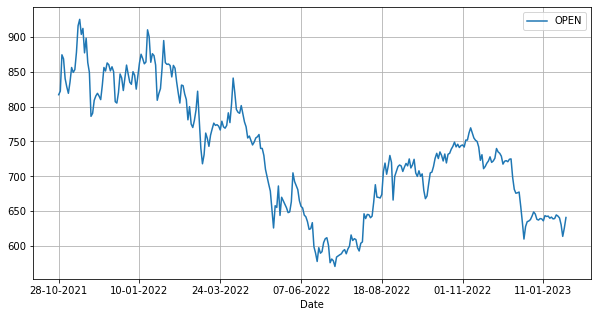

In [10]:
df.plot(x="Date", y=['OPEN'], figsize=(10, 5), grid = True)
plt.show()

<AxesSubplot:>

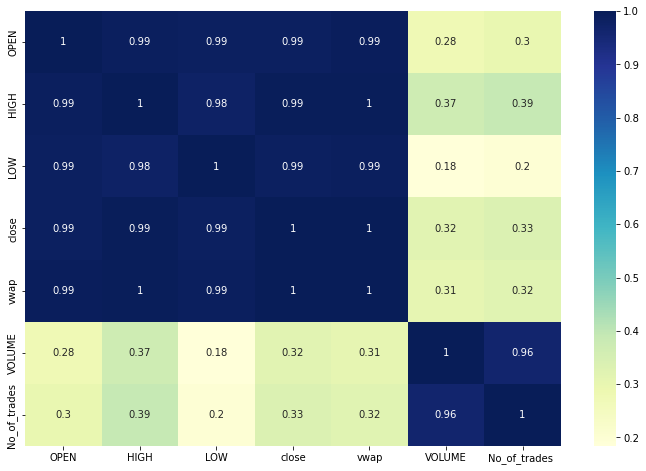

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)

- Here 'close' price is to predict.
- 'close' feature is directly proportion to 'OPEN','HIGH','LOW','vwap'(volume weighted average price).
- According to heatmap 'VOLUME' is not really affect 'close' price. But in stock market volume matters in price change.

### ML Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [13]:
X = df[['OPEN','HIGH','LOW','vwap','VOLUME']]
y = df['close']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state=0)

In [15]:
X_train.shape

(236, 5)

In [16]:
X_test.shape

(79, 5)

In [17]:
regression = LinearRegression()

In [18]:
regression.fit(X_train, y_train)

LinearRegression()

In [19]:
print(regression.coef_)

[ 8.04180486e-02 -3.24552342e-01 -3.24740096e-01  1.56372752e+00
  4.52149906e-08]


In [20]:
print(regression.intercept_)

2.781819876427221


In [21]:
predicted = regression.predict(X_test)

In [22]:
print(X_test)

       OPEN    HIGH     LOW    vwap    VOLUME
65   894.60  899.90  848.60  874.46  11012459
314  641.00  652.80  616.80  639.72   3338066
150  657.00  665.00  650.00  656.85   1587641
158  599.00  601.05  581.45  593.02   3552167
108  840.85  840.95  819.45  828.63   3480544
..      ...     ...     ...     ...       ...
190  639.50  654.90  632.00  646.31   3211110
103  769.00  775.75  766.00  770.13   2496305
161  597.70  597.70  584.15  589.12   1686383
90   730.95  738.60  719.05  729.73   4485413
199  668.95  676.00  668.15  672.10   1526304

[79 rows x 5 columns]


In [23]:
predicted.shape

(79,)

In [24]:
dframe = pd.DataFrame(y_test, predicted)

In [25]:
dfr = pd.DataFrame({'Actual Price' : y_test,
                   'Predicted Price' : predicted})

In [26]:
print(dfr)

     Actual Price  Predicted Price
65         856.90       874.999800
314        628.05       642.661026
150        654.70       655.914312
158        594.35       594.542220
108        822.35       827.269677
..            ...              ...
190        647.95       647.222014
103        767.60       768.487249
161        589.80       588.465230
90         735.05       729.646355
199        671.65       671.255271

[79 rows x 2 columns]


In [27]:
dfr.head(10)

,Actual Price,Predicted Price
65,856.90,874.999800
314,628.05,642.661026
150,654.70,655.914312
158,594.35,594.542220
108,822.35,827.269677
275,717.30,715.873577
135,683.15,663.912610
116,752.75,764.947555
74,798.35,809.849780
262,718.10,720.491752


In [28]:
regression.score(X_test, y_test)

0.9946722985825311

In [29]:
import math
print('Mean Absolute error :', metrics.mean_absolute_error(y_test,predicted))

Mean Absolute error : 4.391301195940913


In [30]:
print('Mean Squared error :', metrics.mean_squared_error(y_test,predicted))

Mean Squared error : 38.87274000125459


In [32]:
print('Root Mean Squared error :', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared error : 6.234800718648078


In [33]:
graph =dfr.head(20)

<AxesSubplot:>

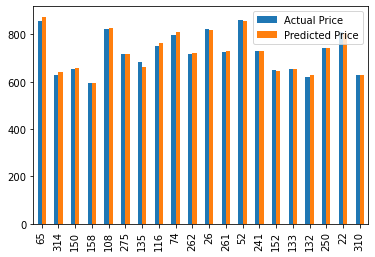

In [34]:
graph.plot(kind='bar')

### Summary
- There is 2% to 5% of difference in acutal price and predicted price. Most of the prediction was accurate.
- This ML model (Linear Regression) is very usefull to positional tradings.
- Stock price is also depends on market sentiment or pattern. So trade according to the market.
- IRCTC is government stock, so that investing for a long term is very good from 03/02/2023.